In [33]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [23]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [24]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6)
print(june)

SELECT measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [25]:
#  3. Convert the June temperatures to a list.
june=[]
june = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

print(june)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [26]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df=pd.DataFrame(june, columns=['temps'])
#june_df
print(june_df.to_string(index=False))

 temps
  78.0
  76.0
  78.0
  76.0
  77.0
  78.0
  77.0
  78.0
  78.0
  79.0
  78.0
  78.0
  78.0
  77.0
  78.0
  78.0
  77.0
  77.0
  82.0
  78.0
  78.0
  78.0
  78.0
  78.0
  77.0
  76.0
  78.0
  78.0
  78.0
  78.0
  77.0
  78.0
  73.0
  70.0
  76.0
  77.0
  77.0
  77.0
  77.0
  78.0
  77.0
  77.0
  78.0
  78.0
  77.0
  78.0
  78.0
  75.0
  76.0
  76.0
  77.0
  78.0
  76.0
  77.0
  75.0
  77.0
  76.0
  76.0
  75.0
  77.0
  77.0
  76.0
  78.0
  77.0
  76.0
  77.0
  76.0
  76.0
  77.0
  77.0
  78.0
  77.0
  77.0
  77.0
  76.0
  75.0
  76.0
  76.0
  77.0
  76.0
  73.0
  73.0
  75.0
  77.0
  76.0
  77.0
  79.0
  78.0
  79.0
  78.0
  78.0
  79.0
  77.0
  77.0
  77.0
  77.0
  77.0
  78.0
  77.0
  76.0
  78.0
  78.0
  77.0
  78.0
  78.0
  73.0
  76.0
  77.0
  75.0
  76.0
  74.0
  75.0
  77.0
  76.0
  77.0
  78.0
  79.0
  77.0
  78.0
  79.0
  78.0
  78.0
  78.0
  78.0
  79.0
  79.0
  82.0
  80.0
  79.0
  79.0
  78.0
  78.0
  77.0
  78.0
  78.0
  73.0
  75.0
  75.0
  76.0
  84.0
  79.0
  76.0

In [27]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [28]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12)
print(december)

SELECT measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [29]:
# 7. Convert the December temperatures to a list.
december=[]
december = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

print(december)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [30]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df=pd.DataFrame(december, columns=['temps'])
#dec_df
print(dec_df.to_string(index=False))

 temps
  76.0
  74.0
  74.0
  64.0
  64.0
  67.0
  77.0
  66.0
  69.0
  68.0
  68.0
  71.0
  74.0
  67.0
  66.0
  69.0
  71.0
  70.0
  70.0
  74.0
  74.0
  71.0
  75.0
  75.0
  72.0
  69.0
  68.0
  73.0
  74.0
  73.0
  73.0
  73.0
  73.0
  71.0
  73.0
  73.0
  77.0
  72.0
  71.0
  73.0
  70.0
  73.0
  69.0
  74.0
  72.0
  71.0
  72.0
  72.0
  70.0
  73.0
  73.0
  72.0
  73.0
  73.0
  72.0
  63.0
  65.0
  71.0
  76.0
  70.0
  76.0
  69.0
  69.0
  69.0
  74.0
  76.0
  74.0
  73.0
  73.0
  74.0
  73.0
  73.0
  73.0
  74.0
  74.0
  71.0
  73.0
  72.0
  64.0
  66.0
  73.0
  72.0
  65.0
  64.0
  69.0
  68.0
  77.0
  71.0
  71.0
  69.0
  68.0
  68.0
  69.0
  70.0
  72.0
  76.0
  75.0
  69.0
  71.0
  71.0
  71.0
  68.0
  65.0
  70.0
  69.0
  69.0
  71.0
  67.0
  73.0
  74.0
  73.0
  67.0
  74.0
  75.0
  75.0
  74.0
  67.0
  73.0
  73.0
  71.0
  72.0
  71.0
  68.0
  65.0
  69.0
  70.0
  70.0
  74.0
  71.0
  74.0
  73.0
  72.0
  74.0
  72.0
  74.0
  75.0
  74.0
  70.0
  74.0
  70.0
  66.0
  61.0

In [31]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### Challenge Summary Additional Items

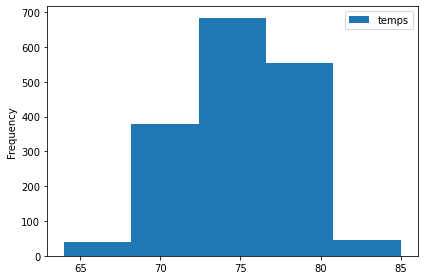

In [34]:
june_df.plot.hist(bins=5) 
#Using plt.tight_layout(), we can compress the x-axis labels so that they fit into the box holding our plot.
plt.tight_layout()

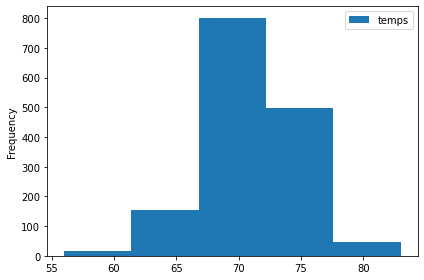

In [35]:
dec_df.plot.hist(bins=5) 
#Using plt.tight_layout(), we can compress the x-axis labels so that they fit into the box holding our plot.
plt.tight_layout()

In [36]:
june_df.mode()

,temps
0,76.0


In [37]:
dec_df.mode()

,temps
0,71.0
